This example covers the basics of using the bode-fano module.

In [1]:
from circuit_reader import *

/home/andrewyi/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


We start by making a CircuitData object. This object is capable of creating a .cir file from a template, simulating that .cir file, and reading the results of it coming from the .txt file that is exported by wrspice.

In [2]:
cd = CircuitData()

# Basic parallel circuit results
Let's start by simulating the results from a Josephson Junction in parallel with a inductor. The parallel circuit has a second inductor that is mutually coupled with the inductor, which creates a flux in the loop. The circuit diagram (with their nodes from wrspice) looks like the following:

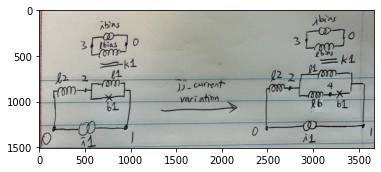

In [3]:
import matplotlib.image as mpimg  # this is just to show the circuit diagram. does not affect the rest of the code
img = mpimg.imread('examples/parallel_circuit_diagram.jpg')
imgplot = plt.imshow(img)
plt.show()

Ground is shared between the mutually coupled circuits at node 0. There is a second, optional inductor (l1) which can be used. This value is currently set to zero, and it is possible to measure the current flowing through it without affecting the circuit itself. By using the "jj_current" variation it is also possible to see the current through the Josephson Junction using a zero-inductance inductor in parallel.

In [4]:
template = "parallel"

We choose the template to use, which is "parallel" for this example. There are more templates which can be found in the templates folder, and are made to make simulations simpler by just needing to change parameter values. There are also default values coded into the template. Let's use them and see what happens.

In [5]:
cd.simulation_cycle(template)

WRspice circuit simulation system, release 4.3.18, build 112023-164152
Copyright (C) Whiteley Research Inc, Sunnyvale CA  2023
All Rights Reserved


Circuit: Parallel circuit

WRSPICE simulation took 0.07396199305852254 minutes.


A simulation_cycle does three things: create the .cir file using default/input parameters from a template, simulate the said .cir file, and read out the results. All these can be done separately if needed. Let's look at the results from the simulation.

In [6]:
print(cd.vars)

[['time', 'S'], ['@b1[phase]', '', 'dims=1'], ['i(l1)', 'A'], ['i(l2)', 'A'], ['i(lbias)', 'A'], ['v(0)-v(2)'], ['v(1)-v(0)', 'V'], ['v(2)-v(1)', 'V'], ['v(3)-v(0)', 'V'], ['v(101)', 'V']]


In [7]:
print(cd.measurables)

{'phases': ['v(101)'], 'currents': ['i(l1)', 'i(l2)', 'i(lbias)'], 'voltages': ['v(0)-v(2)', 'v(1)-v(0)', 'v(2)-v(1)', 'v(3)-v(0)'], 'single_phases': ['@b1[phase]'], 'others': []}


In [8]:
print(cd.data)

               time    @b1[phase]         i(l1)         i(l2)      i(lbias)  \
0      1.000000e-07 -8.567963e-10 -9.399228e-16 -7.348903e-25  1.972152e-28   
1      1.000100e-07  0.000000e+00  9.402589e-13  1.884954e-12  5.909168e-29   
2      1.000200e-07  0.000000e+00  1.881454e-12  3.769902e-12 -1.886812e-27   
3      1.000300e-07  0.000000e+00  2.822643e-12  5.654837e-12  2.181104e-27   
4      1.000400e-07  0.000000e+00  3.763822e-12  7.539751e-12  2.218022e-28   
...             ...           ...           ...           ...           ...   
49996  5.999600e-07  0.000000e+00 -3.765702e-12 -7.539751e-12 -6.012107e-27   
49997  5.999700e-07  0.000000e+00 -2.824523e-12 -5.654837e-12 -2.613799e-27   
49998  5.999800e-07  0.000000e+00 -1.883334e-12 -3.769902e-12  4.794172e-28   
49999  5.999900e-07  0.000000e+00 -9.421388e-13 -1.884954e-12 -7.086221e-28   
50000  6.000000e-07  0.000000e+00 -9.399333e-16 -2.083455e-20  4.354509e-28   

       v(0)-v(2)     v(1)-v(0)     v(2)-v(1)     v(

cd.vars shows what results (measurables) we have, while cd.measurables classifies each of the measured values into phases, currents, or voltages. cd.data prints the results for all measurables through a pandas table. Let's try plotting some of the results. While we can go with matplotlib, there is also a specific plotter class that I made for this purpose.

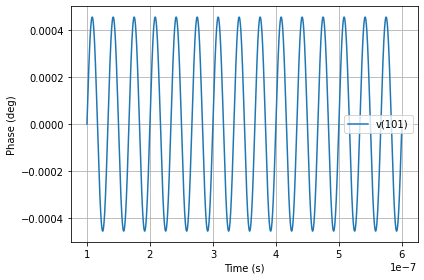

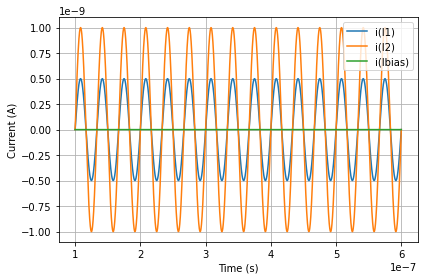

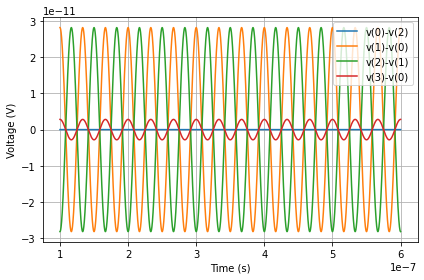

In [9]:
import circuit_plotter as cplt
cplt.plot_cd_measurables(cd)

Note that this was made to quickly look through the data, so plot limits might be not as optimal as expected.

Now we will try making the circuit more interesting. Let's change a few parameters. First, we will change the bias current in the circuit (Give it a certain nonzero value).

In [10]:
cd.change_param("ibias_mag", 3e-5)

We will also add a zero-inductance inductor next to the Josephson Junction to read its current. This is done by using a variation of the template. These variations are also currently added in a separate section of the templates.

Using variation jj_current.
WRspice circuit simulation system, release 4.3.18, build 112023-164152
Copyright (C) Whiteley Research Inc, Sunnyvale CA  2023
All Rights Reserved


Circuit: Parallel circuit

WRSPICE simulation took 0.08133542935053507 minutes.


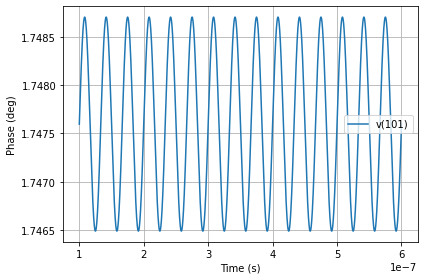

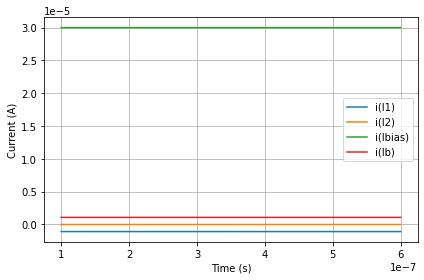

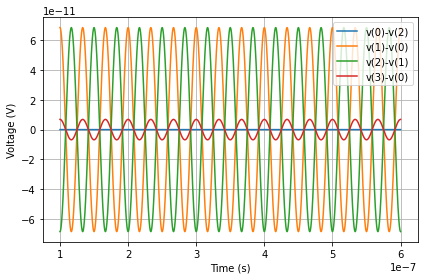

In [11]:
cd.simulation_cycle(template, variation="jj_current")
cplt.plot_cd_measurables(cd)

The currents are offset in a way such that it is hard to compare. Let's remove the offsets caused by DC bias.

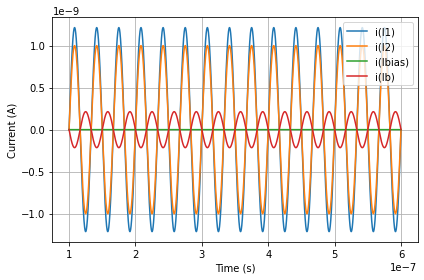

In [12]:
cplt.plot_cd_measurables(cd, input_params="currents", remove_offsets=True)

In this case, we notice that the Josephson Junction is in its negative inductance regime, as shown in the current being 180 degrees out of phase compared to the current in the inductor in parallel. The Josephson Junction is stable because the total inductance of the whole circuit is positive, and therefore globally stable.

Let's change the parameters one last time. This time, we will try to induce some behavior which is no longer in the globally stable regime. Instead of changing the parameters through change_param we will import a prepared parameter file.

Using parameters from params/parallel_params_example.txt.
Using variation jj_current.
WRspice circuit simulation system, release 4.3.18, build 112023-164152
Copyright (C) Whiteley Research Inc, Sunnyvale CA  2023
All Rights Reserved


Circuit: Parallel circuit

WRSPICE simulation took 0.03157074451446533 minutes.


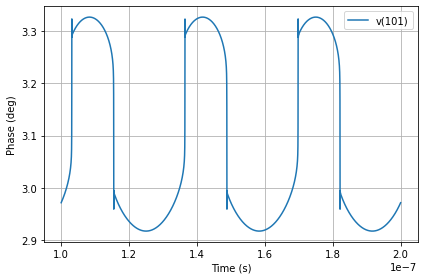

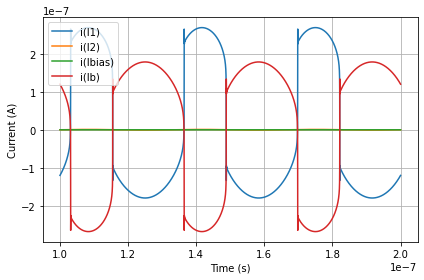

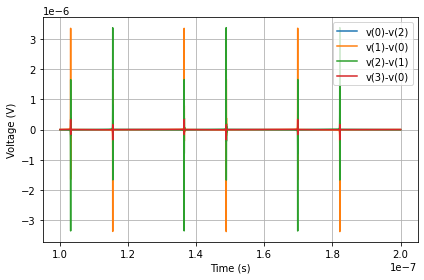

In [13]:
param_file = "params/parallel_params_example.txt"
cd.simulation_cycle(template, param_file_name=param_file, variation="jj_current")
cplt.plot_cd_measurables(cd, remove_offsets=True)

If you'd like to look at how the weird peaks in the voltage look like, for example, you can zoom in:

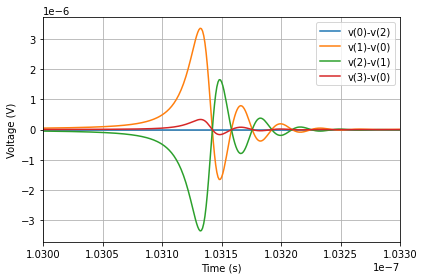

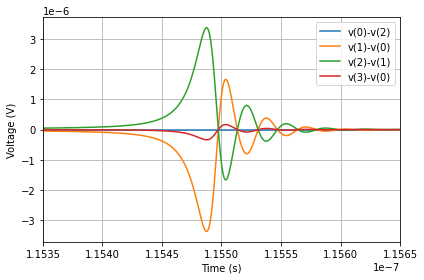

In [14]:
cplt.plot_cd_measurables(cd, input_params="voltages", xlims=(1.030e-7, 1.033e-7))
cplt.plot_cd_measurables(cd, input_params="voltages", xlims=(1.1535e-7, 1.1565e-7))

The voltage acts as if it were exponentially increasing, but suddenly gets damped. This is the unstable behavior that occurs when the global inductance is negative, and the system does not want to stay in that state.

And this concludes the example! As this module is a work in progress things are subject to change, but the basic objectives of the model should stay consistent with what is shown here.